# Capstone Project - The Battle of the Neighborhoods

### Applied Data Science Capstone by Michael Glazer

## Table of Contents
1. Introduction: Business Problem
2. Data
3. Methodology
4. Analysis
5. Results and Discussion
6. Conclusion

## Introduction: Business Problem
This Capstone project will try to find an optimal apartment for an individual currently residing in The Uptown Residences in Toronto, Canada, looking to move to New York City, New York. Along side the criteria of the specification of the new apartment, this report will attempt to find a home for the individual in a neighborhood similar to the neighborhood they currently reside in (Yorkville). 

Throughout this project we will assume that the individuals decision to move to New York City is based around a new job in the Financial District. The Financial District is located in the south end of Manhattan, as a result we will attempt to find an apartment to rent within the surrounding neighborhoods of Tribeca, Soho, Bowery and the Lower East Side.

As previously mentioned, the individual is living in The Uptown Residences, they currently rent a 1-bedroom, 1-bathroom apartment. The size of the apartment is 570 sq. ft. and the current rent is $2400 CAD. The distance to the nearest subway station is <250m, giving the individual east access to transportation throughout the city. The Yorkville neighborhood is one of Canada’s most exclusive shopping districts, along side the numerous shopping options is bars and restaurants, art galleries, office spaces and parks.

In order to create a similar living environment for the individual in New York City, we must be able to find an apartment located in a similar neighborhood that offers similar characteristics to their current situation. In order to live in close proximity to the Financial District we must find the individual a rental unit with the following conditions:

- An apartment with 1-bedroom, and 1-bathroom.
- The unit must not exceed an increased monthly rent of $2300 USD.
- The apartment must be in a neighborhood near the Financial District.
- Must be in proximity to the subway station.
- The neighborhood must have similar attributes to Yorkville to make the transition to New York as seamless as possible.


## Data

Based on the problem at hand, the factors that would affect the decision are:
- The venues in Yorkville which surrounds The Uptown Residences.
- The venues in the different neighborhoods in Manhattan.
- The location of the subway stations in Manhattan.
- The available apartments that meet the desired criteria.
The geocoders from the geoPy library will be used to generate approximate longitudinal and latitudinal coordinates for:
- The Uptown Residences - 35 Balmuto St, Toronto, ON M4Y 0A3, Canada
- Manhattan, New York
- Apartments for rent in New York

Foursquare API will be used to acquire desired venue data.
The neighborhoods and their corresponding longitudinal and latitudinal coordinates are retrieved from https://cocl.us/new_york_dataset.
The list of New York subway stations and their coordinates was retrieved from https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49. Data cleaning is required to obtain each station name, and their latitude and longitude. Google Maps was used to determine the specific subway stations located within the four desired neighborhoods.
Similar to the process completed to acquire the data for the New York subway stations, Google Maps was used to determine the subway stations in Yorkville and their corresponding longitudinal and latitudinal coordinates.

## Methodology

The methodology section is where the data will be gathered, presented in either a table, plot or map and then analyzed. 

Within this section we will examine the venues and subway stations surrounding the individuals current apartment at 35 Balmuto St, Toronto, in order to create an a baseline of what the neighborhood around the new apartment should be like. We will then explore New York City, more specifically Tribeca, Soho, Bowery and the Lower East Side. The venues within each neighborhood will be determined and compared to those surrounding 35 Balmuto St, at that point a further examination into the most similar neighborhood will be conducted. First off, apartments listings that match the individuals criteria will be determined, then the subway stations within the neighborhood will be found. The venues surrounding each apartment will be determined as well as the distance from the a subway station. Finally these results will be compared to the venues and subway station results found at 35 Balmuto St.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [2]:
# @hidden_cell
CLIENT_ID = 'ZPVYU5KJINOUDUG2KJUJPSIR4NNOIHI3TTRNURXI0VA30C5C' # your Foursquare ID
CLIENT_SECRET = 'PSC1BRBK4YPKH3W4BRG3HRRAGHXZKMNN1KMMB1PCA5JXBB32' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZPVYU5KJINOUDUG2KJUJPSIR4NNOIHI3TTRNURXI0VA30C5C
CLIENT_SECRET:PSC1BRBK4YPKH3W4BRG3HRRAGHXZKMNN1KMMB1PCA5JXBB32


The functions below were taken from the IBM/Coursera Capstone Project example to accurately determine the distances rental properties and the surrounding venues and subway stations we need to convert the longitudinal and latitudinal coordinates into 2D Cartesian coordinates. The functions below are designed to allow for easy convertion between latitude/longitude coordinates and 2D Cartesian coordinates (in meters).

In [3]:
# !pip install shapely
import shapely.geometry

# !pip install pyproj
import pyproj

import math

def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

### Toronto Analysis

Let's use the geoPy geocoder to build a dataframe containing the coordinates of the The Uptown Residences.

In [4]:
geopy.geocoders.options.default_user_agent = "my-application"
addressTO = '35 Balmuto St, Toronto, Canada'
geolocator = Nominatim()
locationTO = geolocator.geocode(addressTO)
latitudeTO = locationTO.latitude
longitudeTO = locationTO.longitude
print('The geograpical coordinate of the Yorkville condo is {}, {}.'.format(longitudeTO, latitudeTO))

The geograpical coordinate of the Yorkville condo is -79.3874145473265, 43.6694927.


In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Longitude', 'Latitude', 'X', 'Y'] 

# instantiate the dataframe
curNeighborhood = pd.DataFrame(columns=column_names)

curX, curY = lonlat_to_xy(longitudeTO, latitudeTO)
curNeighborhood = curNeighborhood.append({'Borough': 'Yorkville',
                                      'Neighborhood': 'Yorkville',
                                      'Longitude': longitudeTO,
                                      'Latitude': latitudeTO,
                                      'X': curX,
                                      'Y': curY}, ignore_index=True)
curNeighborhood

,Borough,Neighborhood,Longitude,Latitude,X,Y
0,Yorkville,Yorkville,-79.387415,43.669493,-5.307936e+06,1.050766e+07


Using a modified versions of the getNearbyVenues from the Segmenting and Clustering Neighborhoods in New York City lab, we can get the venues that surround the apartment with a 500 meter radius.

In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=400):
    LIMIT = 100
    venues_list=[]
    venues_list2=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        templist = []
        templist2 = []

        yorkvilleX, yorkvilleY = lonlat_to_xy(lng, lat)
        
        for v in results:
            curX, curY = lonlat_to_xy(v['venue']['location']['lng'], v['venue']['location']['lat'])
            curDistance = calc_xy_distance(yorkvilleX, yorkvilleY, curX, curY)
            templist.append((
            name, 
            lng,
            lat, 
            v['venue']['name'], 
            v['venue']['location']['lng'],
            v['venue']['location']['lat'],   
            curX,
            curY,
            v['venue']['categories'][0]['name']))
            templist2.append((
            name, 
            curX,
            curY,
            curDistance,
            v['venue']['categories'][0]['name']))
            
            
        venues_list.append(templist)
        venues_list2.append(templist2)
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    yorkville_venueDist = pd.DataFrame([item for venue_list2 in venues_list2 for item in venue_list2])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Longitude', 
                  'Neighborhood Latitude', 
                  'Venue', 
                  'Venue Longitude',
                  'Venue Latitude',  
                  'Venue X',
                  'Venue Y',
                  'Venue Category']
    
    yorkville_venueDist.columns = ['Neighborhood',
                  'Venue X',
                  'Venue Y',
                  'Distance To Home',
                  'Venue Category']
    
    return yorkville_venueDist, nearby_venues

In [7]:
yorkville_venueDist, yorkvile_venues = getNearbyVenues(names=curNeighborhood['Neighborhood'], longitudes=curNeighborhood['Longitude'], latitudes=curNeighborhood['Latitude'])

Yorkville


In [8]:
yorkvile_venues.head()

,Neighborhood,Neighborhood Longitude,Neighborhood Latitude,Venue,Venue Longitude,Venue Latitude,Venue X,Venue Y,Venue Category
0,Yorkville,-79.387415,43.669493,Indigo,-79.389057,43.669065,-5.307983e+06,1.050786e+07,Bookstore
1,Yorkville,-79.387415,43.669493,Pi Co.,-79.389852,43.670107,-5.307807e+06,1.050793e+07,Pizza Place
2,Yorkville,-79.387415,43.669493,Wish,-79.385694,43.668759,-5.308074e+06,1.050747e+07,Restaurant
3,Yorkville,-79.387415,43.669493,Sabai Sabai,-79.384857,43.670647,-5.307785e+06,1.050734e+07,Thai Restaurant
4,Yorkville,-79.387415,43.669493,Toronto Hemp Company,-79.385848,43.668419,-5.308126e+06,1.050750e+07,Smoke Shop


In [9]:
yorkvile_venues.groupby('Neighborhood').count()

,Neighborhood Longitude,Neighborhood Latitude,Venue,Venue Longitude,Venue Latitude,Venue X,Venue Y,Venue Category
Neighborhood,,,,,,,,
Yorkville,100,100,100,100,100,100,100,100


In [10]:
print('There are {} uniques categories.'.format(len(yorkvile_venues['Venue Category'].unique())))

There are 60 uniques categories.


#### Map of Yorkville

The red marker displays The Uptown Residences location, while the blue markers displays the venues within the 500 meter radius.

In [11]:
mapTo = folium.Map(location=[latitudeTO, longitudeTO], zoom_start=17)
# add markers to map
for lat, lng, label in zip(yorkvile_venues['Venue Latitude'], yorkvile_venues['Venue Longitude'], yorkvile_venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=10,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(mapTo)  
    
 
for lat, lng, label in zip(curNeighborhood['Latitude'], curNeighborhood['Longitude'], '35 Balmuto St'):  
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=10,
        popup=label,
        color='red',
        fill_color='#a83232',
        fill_opacity=1,
    ).add_to(mapTo)  
    
mapTo  # Uncomment to view map

#### Mean Venue Distance

In [12]:
column_names = ['Address', 'Neighborhood', 'Mean Venue Distance']
neighMeanVenDist = pd.DataFrame(columns=column_names)

In [13]:
meanDist_yorkvile_venues = yorkville_venueDist['Distance To Home'].mean()

neighMeanVenDist = neighMeanVenDist.append({'Address': '35 Balmuto St', 
                                           'Neighborhood': 'Yorkville',
                                           'Mean Venue Distance': meanDist_yorkvile_venues}, ignore_index=True)
neighMeanVenDist

,Address,Neighborhood,Mean Venue Distance
0,35 Balmuto St,Yorkville,369.22138


#### Distribution of Venues

We will determine the distribution of venues based on the distance from The Uptown Residences.

In [14]:
# define the dataframe columns
column_names = ['Distance To Home', '35 Balmuto St'] 

# instantiate the dataframe
venuesInCurNeighborhood_yorkville = pd.DataFrame(columns=column_names)

In [15]:
curNumOfVenues1Count = yorkville_venueDist[yorkville_venueDist['Distance To Home'] < 100]['Distance To Home'].count()
curNumOfVenues2Count = yorkville_venueDist[(yorkville_venueDist['Distance To Home'] >= 100) & (yorkville_venueDist['Distance To Home'] < 200)]['Distance To Home'].count()
curNumOfVenues3Count = yorkville_venueDist[(yorkville_venueDist['Distance To Home'] >= 200) & (yorkville_venueDist['Distance To Home'] < 300)]['Distance To Home'].count()
curNumOfVenues4Count = yorkville_venueDist[(yorkville_venueDist['Distance To Home'] >= 300) & (yorkville_venueDist['Distance To Home'] < 400)]['Distance To Home'].count()
curNumOfVenues5Count = yorkville_venueDist[(yorkville_venueDist['Distance To Home'] >= 400) & (yorkville_venueDist['Distance To Home'] < 500)]['Distance To Home'].count()
curNumOfVenues6Count = yorkville_venueDist[(yorkville_venueDist['Distance To Home'] >= 500)]['Distance To Home'].count()
curNumOfVenuesCount = [curNumOfVenues1Count, curNumOfVenues2Count, curNumOfVenues3Count, curNumOfVenues4Count, curNumOfVenues5Count, curNumOfVenues6Count]

In [16]:
distanceToHomeStr = ['<100', '100 - 200', '200 - 300', '300 - 400', '400 - 500', '500>']
for i in range(len(curNumOfVenuesCount)):
    venuesInCurNeighborhood_yorkville = venuesInCurNeighborhood_yorkville.append({'Distance To Home': distanceToHomeStr[i], 
                                                                                  '35 Balmuto St': curNumOfVenuesCount[i]}, ignore_index=True)

venuesInCurNeighborhood_yorkville

,Distance To Home,35 Balmuto St
0,<100,2
1,100 - 200,13
2,200 - 300,19
3,300 - 400,20
4,400 - 500,24
5,500>,22


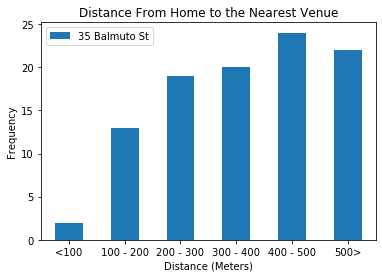

In [18]:
ax = venuesInCurNeighborhood_yorkville.plot.bar(x='Distance To Home', y='35 Balmuto St', rot=0)

ax.set_xlabel('Distance (Meters)')
ax.set_ylabel('Frequency')
ax.set_title('Distance From Home to the Nearest Venue')
ax

#### Distribution of Subway Stations

We determine the distribution of subway stations with respect to The Uptown Residences.

In [19]:
headers = ['Station Name', 'Neighborhood', 'Longitude', 'Latitude', 'X', 'Y', 'Distance To Home']
filename = 'data/Yorkville Subway Stations.csv'
TOMetro_df = pd.read_csv(filename, names = headers, skiprows = 1)

In [20]:
pd.options.mode.chained_assignment = None
yorkvilleX, yorkvilleY = lonlat_to_xy(longitudeTO, latitudeTO)
for i in range(len(TOMetro_df)):
    TOMetro_df['X'][i], TOMetro_df['Y'][i] = lonlat_to_xy(TOMetro_df['Longitude'][i], TOMetro_df['Latitude'][i])
    TOMetro_df['Distance To Home'][i] = calc_xy_distance(yorkvilleX, yorkvilleY, TOMetro_df['X'][i], TOMetro_df['Y'][i])
TOMetro_df

,Station Name,Neighborhood,Longitude,Latitude,X,Y,Distance To Home
0,Bay Station,Yokville,-79.3907,43.6701,-5.307797e+06,1.050803e+07,393.829541
1,Museum Station,Yokville,-79.3935,43.6671,-5.308238e+06,1.050840e+07,803.984971
2,Bloor-Yonge Station,Yokville,-79.3865,43.6706,-5.307771e+06,1.050753e+07,206.607575
3,Rosedale Station,Yokville,-79.3889,43.6768,-5.306754e+06,1.050770e+07,1181.986019
4,Sherbourne Station,Yokville,-79.3764,43.6722,-5.307646e+06,1.050634e+07,1350.817727


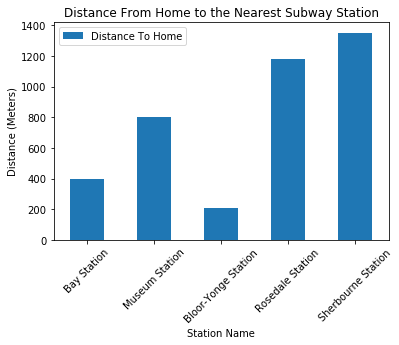

In [21]:
ax = TOMetro_df.plot.bar(x='Station Name', y='Distance To Home', rot=45)

ax.set_xlabel('Station Name')
ax.set_ylabel('Distance (Meters)')
ax.set_title('Distance From Home to the Nearest Subway Station')
ax

### Analyze Yorkville Venues

In [22]:
# one hot encoding
yorkville_onehot = pd.get_dummies(yorkvile_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
yorkville_onehot['Neighborhood'] = yorkvile_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [yorkville_onehot.columns[-1]] + list(yorkville_onehot.columns[:-1])
yorkville_onehot = yorkville_onehot[fixed_columns]

yorkville_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Asian Restaurant,Bagel Shop,Bookstore,Boutique,Bubble Tea Shop,Burger Joint,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comic Shop,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Ethiopian Restaurant,Food & Drink Shop,French Restaurant,Furniture / Home Store,Gourmet Shop,Gym,Health & Beauty Service,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Liquor Store,Lounge,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Music Venue,Nightclub,Park,Pizza Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Shopping Mall,Smoke Shop,Smoothie Shop,Spa,Sushi Restaurant,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Women's Store,Yoga Studio
0,Yorkville,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Yorkville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Yorkville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Yorkville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Yorkville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [23]:
yorkville_onehot.shape

(100, 61)

In [24]:
yorkville_grouped = yorkville_onehot.groupby('Neighborhood').mean().reset_index()
yorkville_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Asian Restaurant,Bagel Shop,Bookstore,Boutique,Bubble Tea Shop,Burger Joint,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comic Shop,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Ethiopian Restaurant,Food & Drink Shop,French Restaurant,Furniture / Home Store,Gourmet Shop,Gym,Health & Beauty Service,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Liquor Store,Lounge,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Music Venue,Nightclub,Park,Pizza Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Shopping Mall,Smoke Shop,Smoothie Shop,Spa,Sushi Restaurant,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Women's Store,Yoga Studio
0,Yorkville,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.09,0.01,0.01,0.01,0.02,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.01,0.01,0.02,0.01,0.03,0.03,0.04,0.04,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.03,0.02,0.03,0.01,0.01,0.01,0.02,0.05,0.02,0.01,0.01,0.01,0.01,0.01,0.02


In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sortedTO = pd.DataFrame(columns=columns)
neighborhoods_venues_sortedTO['Neighborhood'] = yorkville_grouped['Neighborhood']

for ind in np.arange(yorkville_grouped.shape[0]):
    neighborhoods_venues_sortedTO.iloc[ind, 1:] = return_most_common_venues(yorkville_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sortedTO.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Yorkville,Café,Sushi Restaurant,Italian Restaurant,Japanese Restaurant,Coffee Shop,Restaurant,French Restaurant,Hotel,Indian Restaurant,Sandwich Place


### New York Analysis

In [27]:
with open('data/newyork_data.json') as json_data:
    ny_data = json.load(json_data)

nyNHB_data = ny_data['features']

In [28]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Longitude', 'Latitude', 'X', 'Y'] 

# instantiate the dataframe
nyNHB_df = pd.DataFrame(columns=column_names)

In [29]:
for data in nyNHB_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lon = neighborhood_latlon[0]
    neighborhood_lat = neighborhood_latlon[1]
    curX, curY = lonlat_to_xy(neighborhood_lon, neighborhood_lat)
    
    nyNHB_df = nyNHB_df.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Longitude': neighborhood_lon,          
                                          'Latitude': neighborhood_lat,
                                          'X': curX,
                                          'Y': curY},ignore_index=True)
nyNHB_df.head()

,Borough,Neighborhood,Longitude,Latitude,X,Y
0,Bronx,Wakefield,-73.847201,40.894705,-5.790894e+06,9.850049e+06
1,Bronx,Co-op City,-73.829939,40.874294,-5.794276e+06,9.847728e+06
2,Bronx,Eastchester,-73.827806,40.887556,-5.792026e+06,9.847524e+06
3,Bronx,Fieldston,-73.905643,40.895437,-5.790994e+06,9.857548e+06
4,Bronx,Riverdale,-73.912585,40.890834,-5.791797e+06,9.858416e+06


In [30]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(nyNHB_df['Borough'].unique()),
        nyNHB_df.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [31]:
manhattan_data = nyNHB_df[nyNHB_df['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Longitude,Latitude,X,Y
0,Manhattan,Marble Hill,-73.910660,40.876551,-5.794205e+06,9.858099e+06
1,Manhattan,Chinatown,-73.994279,40.715618,-5.821760e+06,9.868103e+06
2,Manhattan,Washington Heights,-73.936900,40.851903,-5.798470e+06,9.861349e+06
3,Manhattan,Inwood,-73.921210,40.867684,-5.795743e+06,9.859410e+06
4,Manhattan,Hamilton Heights,-73.949688,40.823604,-5.803305e+06,9.862859e+06


In [32]:
address = 'Bowery, NY'

geolocator = Nominatim(user_agent="ny_explorer")
bowery_location = geolocator.geocode(address)
bowery_longitude = bowery_location.longitude
bowery_latitude = bowery_location.latitude
print('The geograpical coordinate of Bowery are {}, {}.'.format(bowery_longitude, bowery_latitude))

curX, curY = lonlat_to_xy(bowery_longitude, bowery_latitude)

manhattan_data = manhattan_data.append({'Borough': 'Manhattan',
                                          'Neighborhood': 'Bowery',
                                          'Longitude': bowery_longitude,
                                          'Latitude': bowery_latitude,
                                          'X': curX,
                                          'Y': curY}, ignore_index=True)
manhattan_data.tail()

The geograpical coordinate of Bowery are -73.9960107, 40.7163448.


,Borough,Neighborhood,Longitude,Latitude,X,Y
36,Manhattan,Tudor City,-73.971219,40.746917,-5.816372e+06,9.865272e+06
37,Manhattan,Stuyvesant Town,-73.974052,40.731000,-5.819081e+06,9.865563e+06
38,Manhattan,Flatiron,-73.990947,40.739673,-5.817669e+06,9.867782e+06
39,Manhattan,Hudson Yards,-74.000111,40.756658,-5.814821e+06,9.869041e+06
40,Manhattan,Bowery,-73.996011,40.716345,-5.821643e+06,9.868330e+06


In [33]:
soho_index = manhattan_data.index[manhattan_data['Neighborhood'] == 'Soho'].tolist()[0]
Tribeca_index = manhattan_data.index[manhattan_data['Neighborhood'] == 'Tribeca'].tolist()[0]
Bowery_index = manhattan_data.index[manhattan_data['Neighborhood'] == 'Bowery'].tolist()[0]
Lower_East_Side_index = manhattan_data.index[manhattan_data['Neighborhood'] == 'Lower East Side'].tolist()[0]

In [34]:
desired_neigh_index = [soho_index, Tribeca_index, Bowery_index, Lower_East_Side_index]
spec_manhattan_data = manhattan_data.loc[desired_neigh_index].reset_index(drop=True)
spec_manhattan_data

,Borough,Neighborhood,Longitude,Latitude,X,Y
0,Manhattan,Soho,-74.000657,40.722184,-5.820668e+06,9.868956e+06
1,Manhattan,Tribeca,-74.010683,40.721522,-5.820815e+06,9.870247e+06
2,Manhattan,Bowery,-73.996011,40.716345,-5.821643e+06,9.868330e+06
3,Manhattan,Lower East Side,-73.980890,40.717807,-5.821342e+06,9.866385e+06


### Subway Stations in the Four New York Neighborhoods

In [35]:
# from https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49 a csv file of the new york subway stations was downloaded
headers = ['Station Name', 'Neighborhood', 'Longitude', 'Latitude']
filename = 'data/NY Subway Stations.csv'
nyMetro_df = pd.read_csv(filename, names = headers, skiprows = 1)
nyMetro_df = nyMetro_df.dropna().reset_index(drop = True)
nyMetro_df

,Station Name,Neighborhood,Longitude,Latitude
0,Delancey St - Essex St,Lower East Side,-73.987409,40.718306
1,East Broadway,Lower East Side,-73.990177,40.713855
2,Lower East Side - 2nd Ave,Lower East Side,-73.989938,40.723402
3,Spring St,Soho,-74.003739,40.726227
4,Prince St,Soho,-73.997702,40.724329
5,World Trade Center,Tribeca,-74.009745,40.712564
6,Chambers St,Tribeca,-74.003407,40.713234
7,Canal St,Soho,-73.999826,40.718174
8,Broadway - Lafayette St,Lower East Side,-73.996204,40.725297
9,Bowery,Bowery,-73.993807,40.720247


### Analyze the Five Neighborhoods Venues

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        templist = []
        for v in results:
            curX, curY = lonlat_to_xy(v['venue']['location']['lng'], v['venue']['location']['lat'])
            templist.append((
            name, 
            lng,
            lat, 
            v['venue']['name'], 
            v['venue']['location']['lng'],
            v['venue']['location']['lat'],   
            curX,
            curY,
            v['venue']['categories'][0]['name']))
        venues_list.append(templist)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Longitude', 
                  'Neighborhood Latitude', 
                  'Venue', 
                  'Venue Longitude', 
                  'Venue Latitude',
                  'Venue X',
                  'Venue Y',
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
manhattan_venues = getNearbyVenues(names=spec_manhattan_data['Neighborhood'],
                                   latitudes=spec_manhattan_data['Latitude'],
                                   longitudes=spec_manhattan_data['Longitude'])
manhattan_venues.head()

Soho
Tribeca
Bowery
Lower East Side


,Neighborhood,Neighborhood Longitude,Neighborhood Latitude,Venue,Venue Longitude,Venue Latitude,Venue X,Venue Y,Venue Category
0,Soho,-74.000657,40.722184,Sam Brocato Salon,-74.002562,40.722371,-5.820643e+06,9.869202e+06,Salon / Barbershop
1,Soho,-74.000657,40.722184,Dance With Me SoHo,-74.001363,40.722578,-5.820604e+06,9.869049e+06,Dance Studio
2,Soho,-74.000657,40.722184,Purl Soho,-74.000994,40.722326,-5.820645e+06,9.869000e+06,Arts & Crafts Store
3,Soho,-74.000657,40.722184,SoulCycle SoHo,-73.998717,40.721899,-5.820710e+06,9.868704e+06,Cycle Studio
4,Soho,-74.000657,40.722184,MUJI 無印良品 (MUJI),-74.001015,40.720709,-5.820920e+06,9.868995e+06,Miscellaneous Shop


In [38]:
cplt_venues = pd.concat([yorkvile_venues, manhattan_venues], sort=True, ignore_index=True)
cplt_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude,Venue X,Venue Y
0,Yorkville,43.669493,-79.387415,Indigo,Bookstore,43.669065,-79.389057,-5.307983e+06,1.050786e+07
1,Yorkville,43.669493,-79.387415,Pi Co.,Pizza Place,43.670107,-79.389852,-5.307807e+06,1.050793e+07
2,Yorkville,43.669493,-79.387415,Wish,Restaurant,43.668759,-79.385694,-5.308074e+06,1.050747e+07
3,Yorkville,43.669493,-79.387415,Sabai Sabai,Thai Restaurant,43.670647,-79.384857,-5.307785e+06,1.050734e+07
4,Yorkville,43.669493,-79.387415,Toronto Hemp Company,Smoke Shop,43.668419,-79.385848,-5.308126e+06,1.050750e+07


In [39]:
cplt_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude,Venue X,Venue Y
Neighborhood,,,,,,,,
Bowery,100,100,100,100,100,100,100,100
Lower East Side,100,100,100,100,100,100,100,100
Soho,100,100,100,100,100,100,100,100
Tribeca,100,100,100,100,100,100,100,100
Yorkville,100,100,100,100,100,100,100,100


In [40]:
print('There are {} uniques categories.'.format(len(cplt_venues['Venue Category'].unique())))

There are 157 uniques categories.


In [61]:
# one hot encoding
cplt_onehot = pd.get_dummies(cplt_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cplt_onehot['Neighborhood'] = cplt_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cplt_onehot.columns[-1]] + list(cplt_onehot.columns[:-1])
cplt_onehot = cplt_onehot[fixed_columns]

cplt_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Bagel Shop,Bakery,Bar,Beer Bar,Bookstore,Boutique,Breakfast Spot,Bridge,Bubble Tea Shop,Burger Joint,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Filipino Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Moroccan Restaurant,Movie Theater,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop,Pet Café,Pet Store,Pie Shop,Pilates Studio,Pizza Place,Playground,Poke Place,Ramen Restaurant,Restaurant,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Trail,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Watch Shop,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Yorkville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Yorkville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Yorkville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Yorkville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Yorkville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
cplt_onehot.shape

(500, 156)

In [63]:
cplt_grouped = cplt_onehot.groupby('Neighborhood').mean().reset_index()
cplt_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Bagel Shop,Bakery,Bar,Beer Bar,Bookstore,Boutique,Breakfast Spot,Bridge,Bubble Tea Shop,Burger Joint,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Filipino Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Moroccan Restaurant,Movie Theater,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop,Pet Café,Pet Store,Pie Shop,Pilates Studio,Pizza Place,Playground,Poke Place,Ramen Restaurant,Restaurant,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Trail,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Watch Shop,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Bowery,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.02,0.00,0.02,0.01,0.00,0.02,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.01,0.01,0.01,0.03,0.02,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.05,0.00,0.01,0.00,0.01,0.00,0.02,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.01,0.02,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.01,0.01,0.02
1,Lower East Side,0.00,0.01,0.00,0.00,0.01,0.02,0.00,0.00,0.03,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.03,0.01,0.01,0.01,0.00,0.02,0.01,0.00,0.02,0.00,0.00,0.02,0.03,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.02,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.04,0.00,0.00,0.00,0.05,0.03,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.03,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.03,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.02,0.01,0.02
2,Soho,0.00,0.00,0.00,0.01,0.00,0.02,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.02,0.00,0.00,0.01,0.02,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.04,0.01,0

In [64]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [65]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = cplt_grouped['Neighborhood']

for ind in np.arange(cplt_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cplt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bowery,Hotel,Pizza Place,Wine Bar,Cocktail Bar,Shoe Store,Yoga Studio,Mediterranean Restaurant,Sandwich Place,French Restaurant,Spa
1,Lower East Side,Italian Restaurant,Ice Cream Shop,Japanese Restaurant,Sandwich Place,Wine Bar,Asian Restaurant,Boutique,Coffee Shop,Mexican Restaurant,Sake Bar
2,Soho,Italian Restaurant,Clothing Store,French Restaurant,Gym,Women's Store,Optical Shop,Coffee Shop,Sushi Restaurant,Dessert Shop,Mediterranean Restaurant
3,Tribeca,Park,Hotel,American Restaurant,Coffee Shop,Spa,Sushi Restaurant,Italian Restaurant,Men's Store,Café,Bakery
4,Yorkville,Café,Coffee Shop,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Restaurant,Indian Restaurant,Hotel,Sandwich Place,French Restaurant


In [56]:
# set number of clusters
kclusters = 3

cplt_grouped_clustering = cplt_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cplt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 2, 0], dtype=int32)

In [57]:
cplt_coor_data = pd.concat([curNeighborhood, spec_manhattan_data], sort=True, ignore_index=True)
cplt_coor_data

,Borough,Latitude,Longitude,Neighborhood,X,Y
0,Yorkville,43.669493,-79.387415,Yorkville,-5.307936e+06,1.050766e+07
1,Manhattan,40.722184,-74.000657,Soho,-5.820668e+06,9.868956e+06
2,Manhattan,40.721522,-74.010683,Tribeca,-5.820815e+06,9.870247e+06
3,Manhattan,40.719457,-73.994390,Bowery,-5.821109e+06,9.868135e+06
4,Manhattan,40.717807,-73.980890,Lower East Side,-5.821342e+06,9.866385e+06


### Cluster Results with K = 2

In [52]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cplt_merged = cplt_coor_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cplt_merged = cplt_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

cplt_merged.head() # check the last columns!

,Borough,Latitude,Longitude,Neighborhood,X,Y,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Yorkville,43.669493,-79.387415,Yorkville,-5.307936e+06,1.050766e+07,1,Café,Coffee Shop,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,Restaurant,Indian Restaurant,Hotel,Sandwich Place,French Restaurant
1,Manhattan,40.722184,-74.000657,Soho,-5.820668e+06,9.868956e+06,1,Italian Restaurant,Clothing Store,French Restaurant,Coffee Shop,Gym,Women's Store,Bakery,Boutique,Art Gallery,Dessert Shop
2,Manhattan,40.721522,-74.010683,Tribeca,-5.820815e+06,9.870247e+06,0,Park,American Restaurant,Hotel,Spa,Coffee Shop,Italian Restaurant,Bakery,Men's Store,Sushi Restaurant,Café
3,Manhattan,40.719457,-73.994390,Bowery,-5.821109e+06,9.868135e+06,1,Hotel,Pizza Place,Shoe Store,Cocktail Bar,Sandwich Place,Rock Club,Pilates Studio,Paper / Office Supplies Store,Men's Store,Mediterranean Restaurant
4,Manhattan,40.717807,-73.980890,Lower East Side,-5.821342e+06,9.866385e+06,1,Italian Restaurant,Ice Cream Shop,Asian Restaurant,Coffee Shop,Sandwich Place,Japanese Restaurant,Pizza Place,Boutique,Mexican Restaurant,Wine Bar


In [53]:
cplt_merged.loc[cplt_merged['Cluster Labels'] == 0, cplt_merged.columns[[3] + list(range(7, cplt_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Tribeca,Park,American Restaurant,Hotel,Spa,Coffee Shop,Italian Restaurant,Bakery,Men's Store,Sushi Restaurant,Café


In [54]:
cplt_merged.loc[cplt_merged['Cluster Labels'] == 1, cplt_merged.columns[[3] + list(range(7, cplt_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Yorkville,Café,Coffee Shop,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,Restaurant,Indian Restaurant,Hotel,Sandwich Place,French Restaurant
1,Soho,Italian Restaurant,Clothing Store,French Restaurant,Coffee Shop,Gym,Women's Store,Bakery,Boutique,Art Gallery,Dessert Shop
3,Bowery,Hotel,Pizza Place,Shoe Store,Cocktail Bar,Sandwich Place,Rock Club,Pilates Studio,Paper / Office Supplies Store,Men's Store,Mediterranean Restaurant
4,Lower East Side,Italian Restaurant,Ice Cream Shop,Asian Restaurant,Coffee Shop,Sandwich Place,Japanese Restaurant,Pizza Place,Boutique,Mexican Restaurant,Wine Bar


### Cluster Results with K = 3

In [58]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cplt_merged = cplt_coor_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cplt_merged = cplt_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

cplt_merged.head() # check the last columns!

,Borough,Latitude,Longitude,Neighborhood,X,Y,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Yorkville,43.669493,-79.387415,Yorkville,-5.307936e+06,1.050766e+07,0,Café,Coffee Shop,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,Restaurant,Indian Restaurant,Hotel,Sandwich Place,French Restaurant
1,Manhattan,40.722184,-74.000657,Soho,-5.820668e+06,9.868956e+06,1,Italian Restaurant,Clothing Store,French Restaurant,Coffee Shop,Gym,Women's Store,Bakery,Boutique,Art Gallery,Dessert Shop
2,Manhattan,40.721522,-74.010683,Tribeca,-5.820815e+06,9.870247e+06,2,Park,American Restaurant,Hotel,Spa,Coffee Shop,Italian Restaurant,Bakery,Men's Store,Sushi Restaurant,Café
3,Manhattan,40.719457,-73.994390,Bowery,-5.821109e+06,9.868135e+06,1,Hotel,Pizza Place,Shoe Store,Cocktail Bar,Sandwich Place,Rock Club,Pilates Studio,Paper / Office Supplies Store,Men's Store,Mediterranean Restaurant
4,Manhattan,40.717807,-73.980890,Lower East Side,-5.821342e+06,9.866385e+06,1,Italian Restaurant,Ice Cream Shop,Asian Restaurant,Coffee Shop,Sandwich Place,Japanese Restaurant,Pizza Place,Boutique,Mexican Restaurant,Wine Bar


In [59]:
cplt_merged.loc[cplt_merged['Cluster Labels'] == 0, cplt_merged.columns[[3] + list(range(7, cplt_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Yorkville,Café,Coffee Shop,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,Restaurant,Indian Restaurant,Hotel,Sandwich Place,French Restaurant


In [60]:
cplt_merged.loc[cplt_merged['Cluster Labels'] == 1, cplt_merged.columns[[3] + list(range(7, cplt_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Soho,Italian Restaurant,Clothing Store,French Restaurant,Coffee Shop,Gym,Women's Store,Bakery,Boutique,Art Gallery,Dessert Shop
3,Bowery,Hotel,Pizza Place,Shoe Store,Cocktail Bar,Sandwich Place,Rock Club,Pilates Studio,Paper / Office Supplies Store,Men's Store,Mediterranean Restaurant
4,Lower East Side,Italian Restaurant,Ice Cream Shop,Asian Restaurant,Coffee Shop,Sandwich Place,Japanese Restaurant,Pizza Place,Boutique,Mexican Restaurant,Wine Bar


In [61]:
cplt_merged.loc[cplt_merged['Cluster Labels'] == 2, cplt_merged.columns[[3] + list(range(7, cplt_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Tribeca,Park,American Restaurant,Hotel,Spa,Coffee Shop,Italian Restaurant,Bakery,Men's Store,Sushi Restaurant,Café


We can see that Lower East Side and Yorkville share the most similarities, as a result, going forward we will search for apartments within the Lower East Side neighborhood that fit the individuals criteria.

### Examining Apartments in the Lower East Side

In [36]:
headers = ['Address', 'Longitude', 'Latitude', 'X', 'Y', 'Price', 'Size', 'Rooms']
filename = 'data/lesNYRent_data.csv'
lesNY_rent = pd.read_csv(filename, names = headers, skiprows = 1)

In [37]:
pd.options.mode.chained_assignment = None
geopy.geocoders.options.default_user_agent = "my-application"
for i in range(len(lesNY_rent)):
    address = (lesNY_rent['Address'][i] + ',' + ' Manhattan NY') 
    geolocator = Nominatim() 
    location = geolocator.geocode(address) 
    lesNY_rent['Longitude'][i] = location.longitude 
    lesNY_rent['Latitude'][i] = location.latitude 
    
    lesNY_rent['X'][i], lesNY_rent['Y'][i] = lonlat_to_xy(lesNY_rent['Longitude'][i], lesNY_rent['Latitude'][i])
    
lesNY_rent

,Address,Longitude,Latitude,X,Y,Price,Size,Rooms
0,166 Suffolk St,-73.985019,40.720717,-5.820863e+06,9.866931e+06,2250,500-600,1
1,25 Clinton St,-73.984442,40.720542,-5.820891e+06,9.866856e+06,2050,500-600,1
2,43 Clinton St,-73.984887,40.719949,-5.820993e+06,9.866910e+06,2253,650,1
3,93 Clinton St,-73.985535,40.718592,-5.821225e+06,9.866988e+06,1950,500-600,1
4,57 Pitt St,-73.983062,40.717764,-5.821357e+06,9.866665e+06,2250,500,1
5,191 Henry St,-73.987951,40.713705,-5.822063e+06,9.867277e+06,2300,NaN,2
6,164 Henry St,-73.989205,40.713268,-5.822141e+06,9.867437e+06,1995,NaN,1
7,167 Ludlow St,-73.987762,40.721634,-5.820717e+06,9.867289e+06,2195,NaN,1
8,176-178 Ludlow St,-73.987392,40.721742,-5.820697e+06,9.867242e+06,1850,500-600,1
9,120 Orchard St,-73.989321,40.719365,-5.821107e+06,9.867480e+06,2249,400,1


In [38]:
headers = ['Borough', 'Neighborhood', 'Median Rent']
filename = 'data/manhattanRentData.csv'
nyRentData = pd.read_csv(filename, names = headers, skiprows = 1)
nyRentData.head()

,Borough,Neighborhood,Median Rent
0,Queens,Astoria,1650
1,Manhattan,Battery Park City,3170
2,Brooklyn,Bay Ridge,1450
3,Bronx,Bedford Park,1325
4,Brooklyn,Bedford-Stuyvesant,1875


In [39]:
manRentData = nyRentData[nyRentData['Borough'] == 'Manhattan'].reset_index(drop = True)
manRentData.head()

,Borough,Neighborhood,Median Rent
0,Manhattan,Battery Park City,3170
1,Manhattan,Central Harlem,1797
2,Manhattan,Central Park South,3300
3,Manhattan,Chelsea,3000
4,Manhattan,Chinatown,1996


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f585e3543c8>],
      dtype=object)

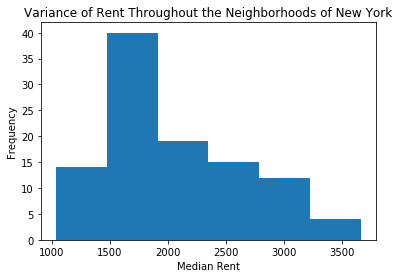

In [40]:
ax = nyRentData.hist(column='Median Rent', grid=False, bins=6)

ax = ax[0]
for x in ax:
    x.set_xlabel('Median Rent')
    x.set_ylabel('Frequency')
    x.set_title('Variance of Rent Throughout the Neighborhoods of New York')
ax

In [41]:
les_index = manRentData.index[manRentData['Neighborhood'] == 'Lower East Side'].tolist()[0]
manRentData.iloc[[les_index]].reset_index(drop = True)

,Borough,Neighborhood,Median Rent
0,Manhattan,Lower East Side,2199


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f585e347f98>],
      dtype=object)

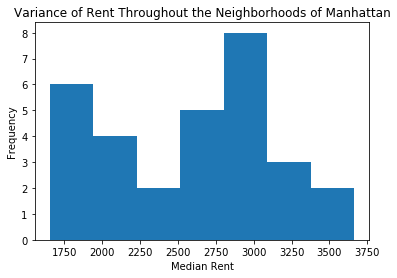

In [42]:
ax = manRentData.hist(column='Median Rent', grid=False, bins=7)

ax = ax[0]
for x in ax:
    x.set_xlabel('Median Rent')
    x.set_ylabel('Frequency')
    x.set_title('Variance of Rent Throughout the Neighborhoods of Manhattan')
ax

### Analyzing the Distance From the Rental Properties to the Venues

In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=400):
    
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        templist = []
        yorkvilleX, yorkvilleY = lonlat_to_xy(lng, lat)
        
        for v in results:
            curX, curY = lonlat_to_xy(v['venue']['location']['lng'], v['venue']['location']['lat'])
            curDistance = calc_xy_distance(yorkvilleX, yorkvilleY, curX, curY)
            templist.append((
            name, 
            lng,
            lat, 
            v['venue']['name'], 
            v['venue']['location']['lng'],
            v['venue']['location']['lat'],   
            curX,
            curY,
            curDistance,
            v['venue']['categories'][0]['name']))
        venues_list.append(templist)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Apartment Address', 
                  'Apartment Longitude', 
                  'Apartment Latitude', 
                  'Venue', 
                  'Venue Longitude',
                  'Venue Latitude',  
                  'Venue X',
                  'Venue Y',
                  'Distance To Home',
                  'Venue Category']
    
    return(nearby_venues)

In [44]:
lesApart_venues = getNearbyVenues(names=lesNY_rent['Address'],
                                   latitudes=lesNY_rent['Latitude'],
                                   longitudes=lesNY_rent['Longitude'])
lesApart_venues.head()

166 Suffolk St
25 Clinton St
43 Clinton St
93 Clinton St
57 Pitt St
191 Henry St
164 Henry St
167 Ludlow St
176-178 Ludlow St
120 Orchard St
72 Orchard St


,Apartment Address,Apartment Longitude,Apartment Latitude,Venue,Venue Longitude,Venue Latitude,Venue X,Venue Y,Distance To Home,Venue Category
0,166 Suffolk St,-73.985019,40.720717,Blue Bottle Coffee,-73.985224,40.719140,-5.821131e+06,9.866950e+06,268.824011,Coffee Shop
1,166 Suffolk St,-73.985019,40.720717,Pause Cafe,-73.983980,40.721264,-5.820767e+06,9.866799e+06,163.164328,Juice Bar
2,166 Suffolk St,-73.985019,40.720717,Pig and Khao,-73.984891,40.719275,-5.821107e+06,9.866908e+06,245.231315,Filipino Restaurant
3,166 Suffolk St,-73.985019,40.720717,Ginger & Lemongrass,-73.985630,40.719289,-5.821107e+06,9.867003e+06,254.742214,Vietnamese Restaurant
4,166 Suffolk St,-73.985019,40.720717,Gaia Italian Cafe,-73.985400,40.721960,-5.820654e+06,9.866986e+06,216.593060,Italian Restaurant


In [45]:
# define the dataframe columns
distanceToHomeStr = ['<100', '100 - 200', '200 - 300', '300 - 400', '400 - 500', '500>']
column_names = [curAddress for curAddress in lesNY_rent['Address']] 
venuesInCurNeighborhood_les = pd.DataFrame({'Distance To Home': distanceToHomeStr})

venuesInCurNeighborhood_les

,Distance To Home
0,<100
1,100 - 200
2,200 - 300
3,300 - 400
4,400 - 500
5,500>


#### Distribution of Venues

We will determine the distribution of venues based on the distance to the several apartments in the Lower East Side.

In [46]:
curNumOfVenuesCount = []
for i, addr in enumerate(lesNY_rent['Address']):
    curAddr_venues = lesApart_venues[lesApart_venues['Apartment Address'] == addr].reset_index(drop=True)
    curNumOfVenues1Count = curAddr_venues[(curAddr_venues['Distance To Home'] < 100)]['Distance To Home'].count()
    curNumOfVenues2Count = curAddr_venues[(curAddr_venues['Distance To Home'] >= 100) & (curAddr_venues['Distance To Home'] < 200)]['Distance To Home'].count()
    curNumOfVenues3Count = curAddr_venues[(curAddr_venues['Distance To Home'] >= 200) & (curAddr_venues['Distance To Home'] < 300)]['Distance To Home'].count()
    curNumOfVenues4Count = curAddr_venues[(curAddr_venues['Distance To Home'] >= 300) & (curAddr_venues['Distance To Home'] < 400)]['Distance To Home'].count()
    curNumOfVenues5Count = curAddr_venues[(curAddr_venues['Distance To Home'] >= 400) & (curAddr_venues['Distance To Home'] < 500)]['Distance To Home'].count()
    curNumOfVenues6Count = curAddr_venues[(curAddr_venues['Distance To Home'] >= 500)]['Distance To Home'].count()

    curdata = pd.DataFrame({column_names[i] : [curNumOfVenues1Count, curNumOfVenues2Count, curNumOfVenues3Count, curNumOfVenues4Count, curNumOfVenues5Count, curNumOfVenues6Count]})
    venuesInCurNeighborhood_les = pd.concat([venuesInCurNeighborhood_les, curdata], axis=1)

venuesInCurNeighborhood_les

,Distance To Home,166 Suffolk St,25 Clinton St,43 Clinton St,93 Clinton St,57 Pitt St,191 Henry St,164 Henry St,167 Ludlow St,176-178 Ludlow St,120 Orchard St,72 Orchard St
0,<100,5,3,3,2,0,2,2,15,12,5,13
1,100 - 200,4,8,10,17,2,5,8,13,14,17,10
2,200 - 300,16,11,7,7,3,7,5,17,17,23,27
3,300 - 400,20,9,14,26,15,7,13,18,20,20,30
4,400 - 500,35,36,26,18,14,18,19,23,23,27,18
5,500>,20,23,32,30,28,19,17,14,14,8,2


##### Distribution of Venues (The Uptown Residences)

In [47]:
venuesInCurNeighborhood_yorkville

,Distance To Home,35 Balmuto St
0,<100,2
1,100 - 200,13
2,200 - 300,19
3,300 - 400,20
4,400 - 500,24
5,500>,22


#### Distribution of Venues

In [48]:
venueDis = pd.merge(venuesInCurNeighborhood_yorkville, venuesInCurNeighborhood_les, how='outer', on='Distance To Home')
venueDis

,Distance To Home,35 Balmuto St,166 Suffolk St,25 Clinton St,43 Clinton St,93 Clinton St,57 Pitt St,191 Henry St,164 Henry St,167 Ludlow St,176-178 Ludlow St,120 Orchard St,72 Orchard St
0,<100,2,5,3,3,2,0,2,2,15,12,5,13
1,100 - 200,13,4,8,10,17,2,5,8,13,14,17,10
2,200 - 300,19,16,11,7,7,3,7,5,17,17,23,27
3,300 - 400,20,20,9,14,26,15,7,13,18,20,20,30
4,400 - 500,24,35,36,26,18,14,18,19,23,23,27,18
5,500>,22,20,23,32,30,28,19,17,14,14,8,2


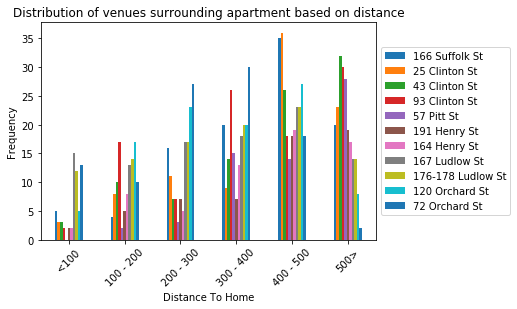

In [49]:
headerNames = [curAddr for curAddr in lesNY_rent['Address']]
ax = venueDis.plot.bar(x='Distance To Home', y=headerNames, rot=45)
ax.set_xlabel('Distance To Home')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of venues surrounding apartment based on distance')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Mean Venue Distance

In [50]:
for i in range(len(lesNY_rent['Address'])):
    meanDist_lesApart_venues = lesApart_venues[lesApart_venues['Apartment Address'] == lesNY_rent['Address'][i]]['Distance To Home'].mean()

    neighMeanVenDist = neighMeanVenDist.append({'Address': lesNY_rent['Address'][i], 
                                               'Neighborhood': 'Lower East Side',
                                               'Mean Venue Distance': meanDist_lesApart_venues}, ignore_index=True)
neighMeanVenDist

,Address,Neighborhood,Mean Venue Distance
0,35 Balmuto St,Yorkville,369.221380
1,166 Suffolk St,Lower East Side,393.430150
2,25 Clinton St,Lower East Side,401.982620
3,43 Clinton St,Lower East Side,410.888026
4,93 Clinton St,Lower East Side,382.753581
5,57 Pitt St,Lower East Side,457.111801
6,191 Henry St,Lower East Side,415.590659
7,164 Henry St,Lower East Side,396.338110
8,167 Ludlow St,Lower East Side,313.051915
9,176-178 Ludlow St,Lower East Side,320.702346


We can see from the table above that the mean venue distance of 4 apartments in the Lower East Side is equal to or smaller compared to the mean venue distance of 35 Balmuto St. Moving forwards we will examine these 4 apartments.

In [51]:
curNeighMeanVenDist = neighMeanVenDist[neighMeanVenDist['Neighborhood'] == 'Yorkville']['Mean Venue Distance']
curNeighMeanVenDist = neighMeanVenDist[((neighMeanVenDist['Mean Venue Distance']) <= (neighMeanVenDist[neighMeanVenDist['Neighborhood'] == 'Yorkville']['Mean Venue Distance'][0])) 
                                       & (neighMeanVenDist['Neighborhood'] != 'Yorkville')].reset_index(drop = True)

curNeighMeanVenDist

,Address,Neighborhood,Mean Venue Distance
0,167 Ludlow St,Lower East Side,313.051915
1,176-178 Ludlow St,Lower East Side,320.702346
2,120 Orchard St,Lower East Side,320.433548
3,72 Orchard St,Lower East Side,280.239062


### Analyzing the Distance from the Subway Stations to the Apartments

In [52]:
headerNames = [curAddr for curAddr in curNeighMeanVenDist['Address']]
lesMetro_df = nyMetro_df[nyMetro_df['Neighborhood'] == 'Lower East Side'].reset_index(drop=True)
for headerID in headerNames:
    lesMetro_df[headerID] = [float('nan') for i in range(len(lesMetro_df))]

In [53]:
pd.options.mode.chained_assignment = None

for i in range(len(lesMetro_df)):
    for j, addr in enumerate(headerNames):
        curStnX, curStnY = lonlat_to_xy(lesMetro_df['Longitude'][i], lesMetro_df['Latitude'][i])
        lesMetro_df[addr][i] = calc_xy_distance(curStnX, curStnY, lesNY_rent['X'][j], lesNY_rent['Y'][j])
lesMetro_df

,Station Name,Neighborhood,Longitude,Latitude,167 Ludlow St,176-178 Ludlow St,120 Orchard St,72 Orchard St
0,Delancey St - Essex St,Lower East Side,-73.987409,40.718306,512.410049,539.185898,428.765528,246.824828
1,East Broadway,Lower East Side,-73.990177,40.713855,1341.372938,1354.954398,1239.391987,1002.734509
2,Lower East Side - 2nd Ave,Lower East Side,-73.989938,40.723402,781.542993,859.573095,876.572959,994.506363
3,Broadway - Lafayette St,Lower East Side,-73.996204,40.725297,1639.734414,1719.407901,1719.797384,1786.375893


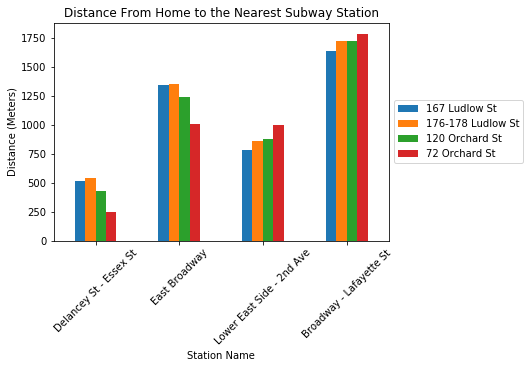

In [54]:
ax = lesMetro_df.plot.bar(x='Station Name', y=headerNames, rot=45)
ax.set_xlabel('Station Name')
ax.set_ylabel('Distance (Meters)')
ax.set_title('Distance From Home to the Nearest Subway Station')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Consolidated Map

From the plot we see that the appartment at 72 Orchard St is the closest to a subway stop with a distance of ≈246.8m, making this appartment the most desirbale.

In [55]:
addressles = '72 Orchard St, New York'
geolocator = Nominatim()
locationles = geolocator.geocode(addressles)
latitudeles = locationles.latitude
longitudeles = locationles.longitude
print('The geograpical coordinate of 72 Orchard St is {}, {}.'.format(latitudeles, longitudeles))

The geograpical coordinate of 72 Orchard St is 40.71754575, -73.9902889398929.


In [56]:
curApp_details = lesNY_rent[lesNY_rent['Address'] == '72 Orchard St']
curApt_venues = lesApart_venues[lesApart_venues['Apartment Address'] == '72 Orchard St']

In [57]:
lesRentMap = folium.Map(location = [latitudeles, longitudeles], zoom_start = 17)

# add markers to map
for lat, lng, label in zip(curApp_details['Latitude'], curApp_details['Longitude'],'$ ' + curApp_details['Price'].astype(str)+ ',  '+ curApp_details['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(lesRentMap) 
    
# add markers of subway locations to map
for lat, lng, label in zip(lesMetro_df['Latitude'], lesMetro_df['Longitude'],  lesMetro_df['Station Name'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='#a83232',
        fill_opacity=2.5,
    ).add_to(lesRentMap) 
    
    
# add markers of venues locations to map
for lat, lng, label in zip(curApt_venues['Venue Latitude'], curApt_venues['Venue Longitude'],  curApt_venues['Venue'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='green',
        fill_color='#34a832',
        fill_opacity=2.5,
    ).add_to(lesRentMap) 

lesRentMap

## Results & Discussion

Using the k means clustering algorithm we are able to examine the characteristics of the 5 neighborhoods. We saw that Tribeca had the least in common to Yorkville and the other 3 Manhattan neighborhoods.  Based on the frequency of the venues in each neighborhood it was determined that the Lower East Side was the most similar to Yorkville. 

Using the mean venue distance and the distribution of the venues, the number of available apartments for rent in the Lower East Side was reduced to:
- 167 Ludlow St
- 176-178 Ludlow St
- 120 Orchard St
- 72 Orchard St

The apartment located at 72 Orchard St is the most desirable for the individual in this capstone project. It is a 1-bedroom, 1-bathroom apartment priced at $2300 USD located in the Lower East Side neighborhood. The selection was based on the individuals specified criteria and the analysis previously conducted, those being:
- The apartment is located in the neighborhood most similar to Yorkville.
- It is the closest in proximity to a subway station.

## Conclusion

The purpose of this project was to determine the best apartment for an individual to rent in either Tribeca, Soho, Bowery or the Lower East Side (neighborhood’s which surrounds the financial district in Manhattan), based on the neighborhood’s similarity to Yorkville (the individual’s current neighborhood), proximity to venues, distance to the subway stations and the price of the apartment.

Using the k means clustering algorithm, the four Manhattan neighborhoods along with Yorkville are grouped together based on the top 10 frequent venues. The use of the algorithm was to determine the neighborhood most similar to Yorkville. The algorithm was run with varying number of clusters, k = 2, 3…, N until Yorkville was either grouped with 1 other neighborhood or was in a cluster alone.

After the neighborhood is determined, analysis of potential rental apartments is conducted. The distribution of the venues based on proximity to the apartment, the mean venue distance and the distance to the surrounding subway stations is determined.

The apartment on 72 Orchard St is the best fit for the individual based off of statistical analysis. In reality there are sometimes other factors that can affect an individual’s selection, such as the appearance of the apartment, or the landlord, in that case this program provides alternative options.